In [1]:
#!pip install opencv-contrib-python

In [2]:
#!pip install keras

In [3]:
#!pip install mtcnn #face detection algorithm

In [4]:
#!pip install keras_vggface

In [5]:
%matplotlib inline

In [65]:
import urllib.request
import matplotlib.pyplot as plt
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle

import numpy as np
from PIL import Image

import cv2
from cv2 import GaussianBlur, CascadeClassifier, imdecode, imread, cvtColor, rectangle


ModuleNotFoundError: No module named 'google.colab'

In [7]:
print(mtcnn.__version__)

0.1.0


In [18]:
#!dir

In [9]:
filename = 'queen.jpg' #source: https://www.flickr.com/photos/37814055@N08/3474558151
image = plt.imread(filename)

Shape of image:  (431, 448, 3)


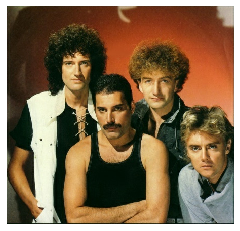

In [10]:
print('Shape of image: ', image.shape)
plt.axis('off')
plt.imshow(image)
plt.show()

In [11]:
detector = MTCNN()

In [12]:
faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [107, 85, 59, 81], 'confidence': 0.9999432563781738, 'keypoints': {'left_eye': (123, 114), 'right_eye': (152, 114), 'nose': (139, 134), 'mouth_left': (126, 146), 'mouth_right': (149, 147)}}
{'box': [357, 247, 69, 88], 'confidence': 0.9998255372047424, 'keypoints': {'left_eye': (373, 281), 'right_eye': (405, 278), 'nose': (389, 301), 'mouth_left': (382, 317), 'mouth_right': (405, 316)}}
{'box': [261, 114, 70, 90], 'confidence': 0.9997377991676331, 'keypoints': {'left_eye': (279, 147), 'right_eye': (311, 148), 'nose': (293, 171), 'mouth_left': (279, 183), 'mouth_right': (309, 184)}}
{'box': [171, 163, 75, 109], 'confidence': 0.9969556331634521, 'keypoints': {'left_eye': (186, 204), 'right_eye': (220, 201), 'nose': (199, 228), 'mouth_left': (192, 247), 'mouth_right': (225, 245)}}


In [13]:
def highlight_faces(image_path, faces, linewidth, radius):
    #display image
    image = plt.imread(image_path)
    
    #show data
    plt.axis('off')
    plt.imshow(image)
    
    #get the context for drawing boxes
    ax = plt.gca()
    
    #for each face draw a rectangle based on coordinates
    for face in faces: 
        #get coordinates
        x, y, width, height = face['box']
        
        # create the shape
        face_border = Rectangle((x,y), width, height, 
                                fill = False, lw = linewidth, color = 'green')
        #draw the box
        ax.add_patch(face_border)
        
        #draw dots where face features are
        for key, value in face['keypoints'].items():
            #create and draw dot
            dot = Circle(value, radius = radius, color = 'green', alpha = 0.7)
            ax.add_patch(dot)
            
    plt.show()

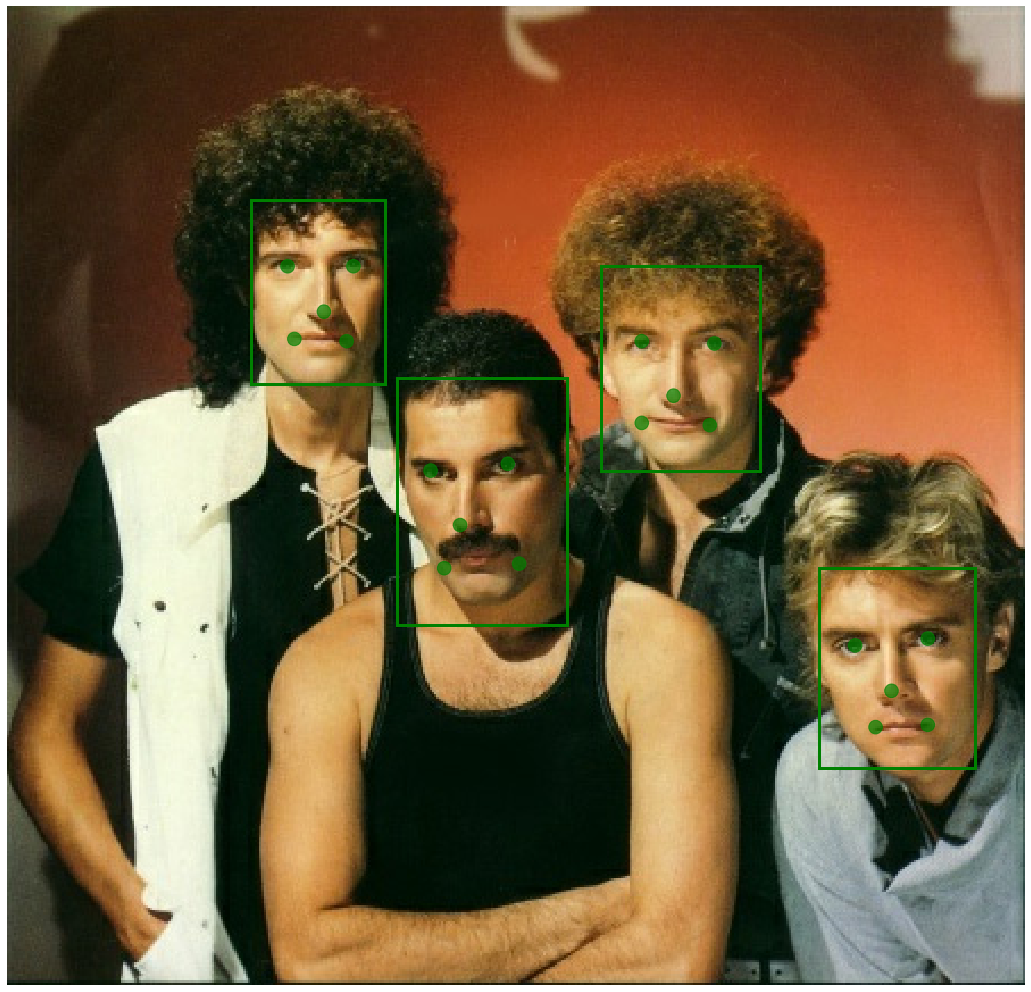

In [14]:
plt.figure(figsize=(20,18))
highlight_faces(filename, faces, 3, 3)

In [15]:
#Extract face for further analysis

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = np.array(face_image)
        face_images.append(face_array)

    return face_images

In [16]:
extracted_face = extract_face_from_image(filename)

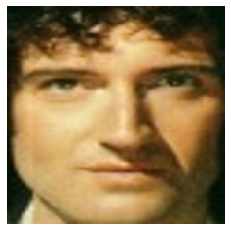

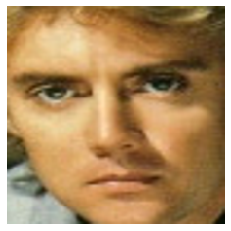

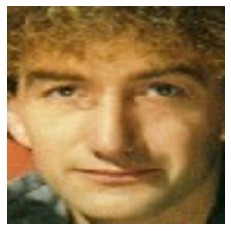

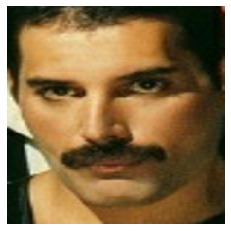

In [17]:
for face in extracted_face:
    plt.imshow(face)
    plt.axis('off')
    plt.show()

## Test

In [19]:
face_crop = []

In [22]:
face_cascade = CascadeClassifier('haarcascade_frontalface_default.xml')

In [27]:
from urllib.request import urlopen
req = urlopen('https://tvseriesfinale.com/wp-content/uploads/2014/04/siliconvalley03-590x331.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

In [29]:
arr

array([255, 216, 255, ..., 208, 255, 217], dtype=uint8)

In [33]:
img_f = open(filename, 'rb')
image_bytes = img_f.read()
arr = imdecode(np.frombuffer(image_bytes, np.uint8), -1)

In [35]:
result_image = arr.copy()

In [49]:
gray = cvtColor(result_image, cv2.COLOR_BGR2GRAY)

In [50]:
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
print(faces)

[[102  85  75  75]
 [161 172  85  85]
 [345 246  86  86]
 [313 246  87  87]
 [255 118  81  81]]


In [57]:
for(x, y, w, h) in faces:
    rectangle(arr, (x, y), (x+w, y+h), (255, 0 ,0), 2)
    

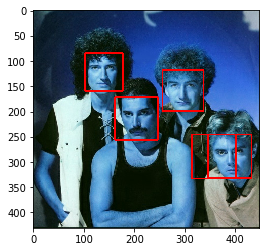

In [66]:
plt.imshow(arr)